In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [62]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Visualizing

In [65]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


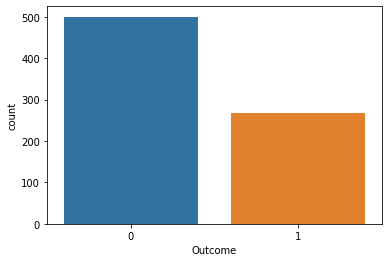

In [66]:
import seaborn as sns
sns.countplot(data['Outcome'],label="Count")

In [67]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [68]:
data.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

#check outlier and gaussian shape

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb96e159b0>,
      dtype=object)

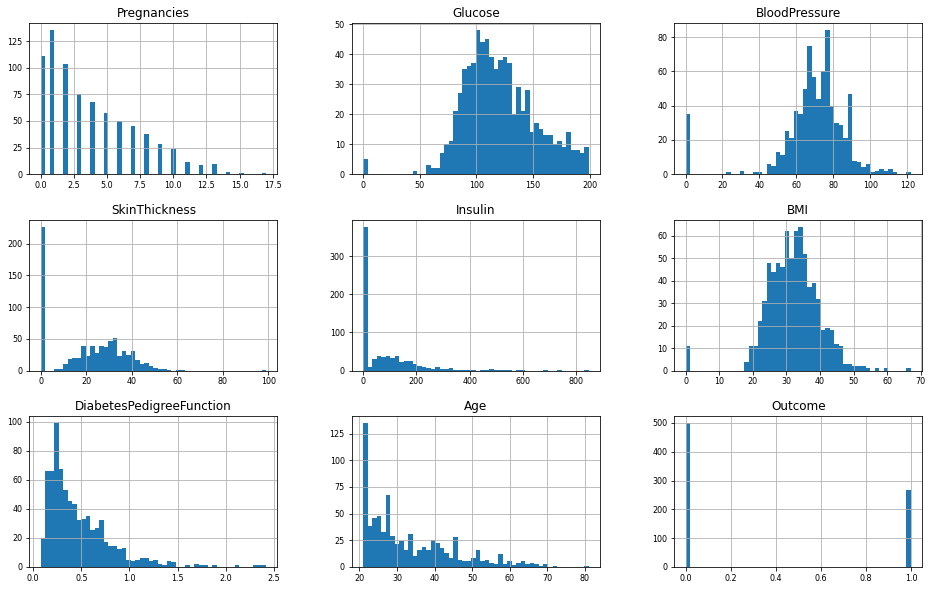

In [69]:
data[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']].hist(figsize=(16,10),bins=50 ,xlabelsize=8, ylabelsize=8)

# Outlier Cleaning

Pregnancies more than 10 is ideally not good so we consider it as outlier.

Body mass index is weight to height ration so weight less than 12 is not range of adults so we consider it as outlier.

bloodpressure lower than 40 is criticly low pressure so we consider it as outlier
Glucose lower than 40 is criticly low pressure so we consider it as outlier.

SkinThickness lower than 60 is criticly low pressure so we consider it as outlier



In [70]:
from scipy import stats

In [71]:
z_scores = stats.zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_data = data[filtered_entries]
print(new_data)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
5              5      116  ...   30        0
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[688 rows x 9 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb96e1e358>,
      dtype=object)

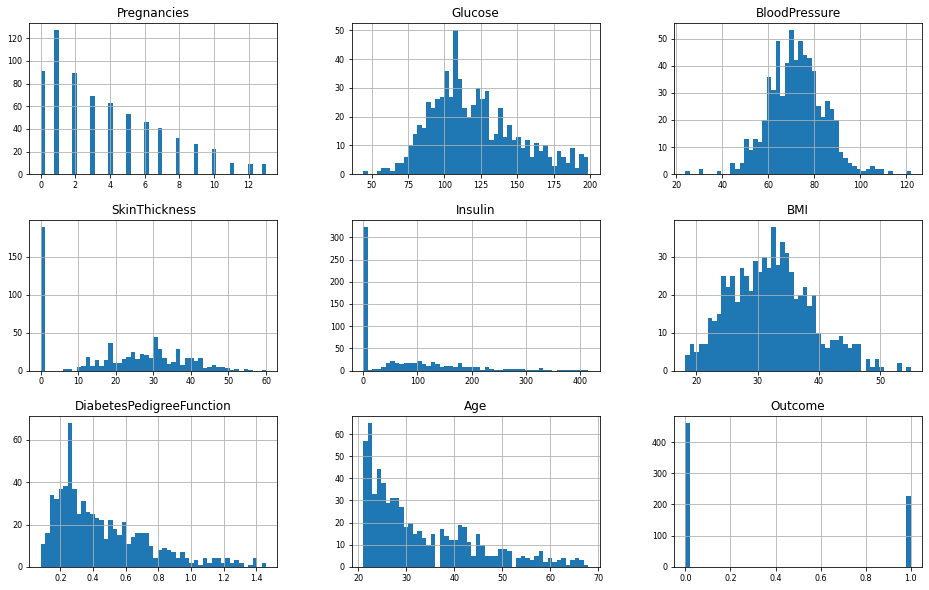

In [72]:

new_data[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']].hist(figsize=(16,10),bins=50 ,xlabelsize=8, ylabelsize=8)

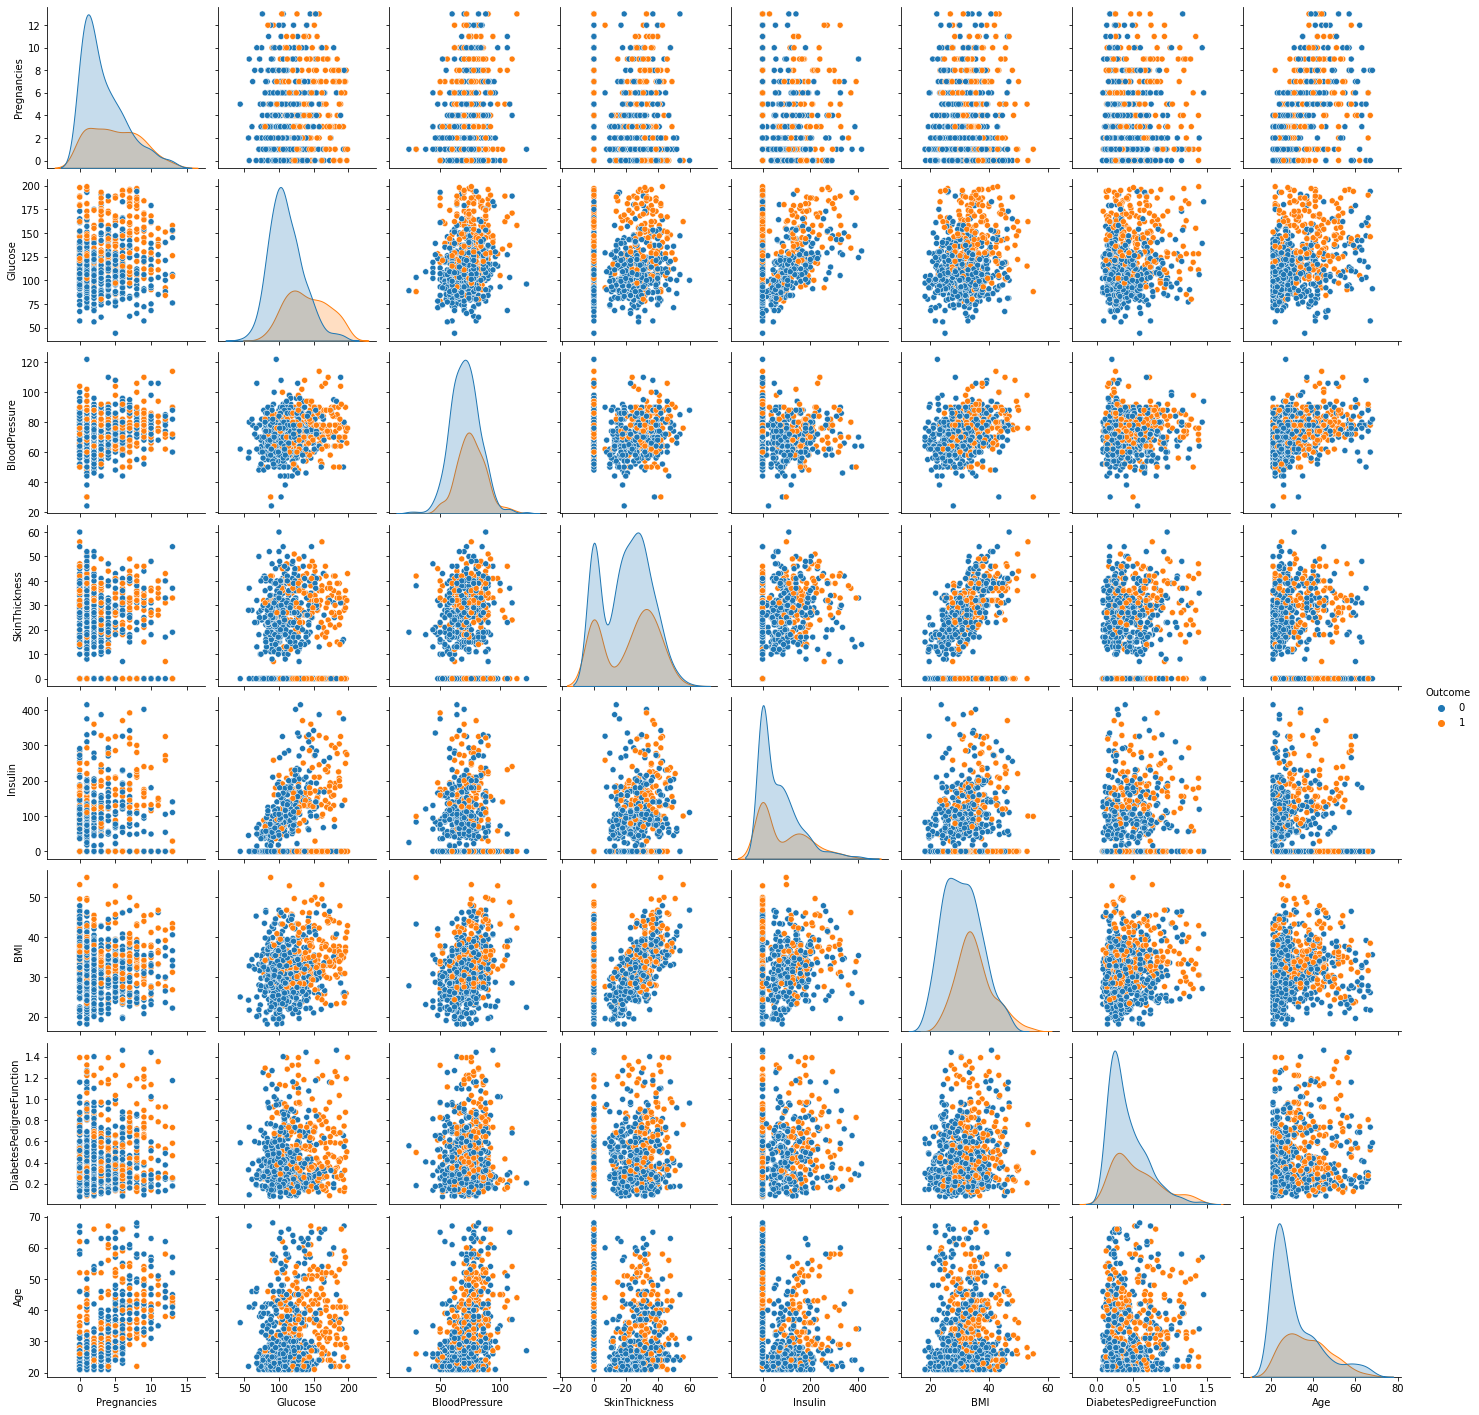

In [73]:
sns.pairplot(new_data, hue="Outcome", diag_kind='kde')

#Correlations

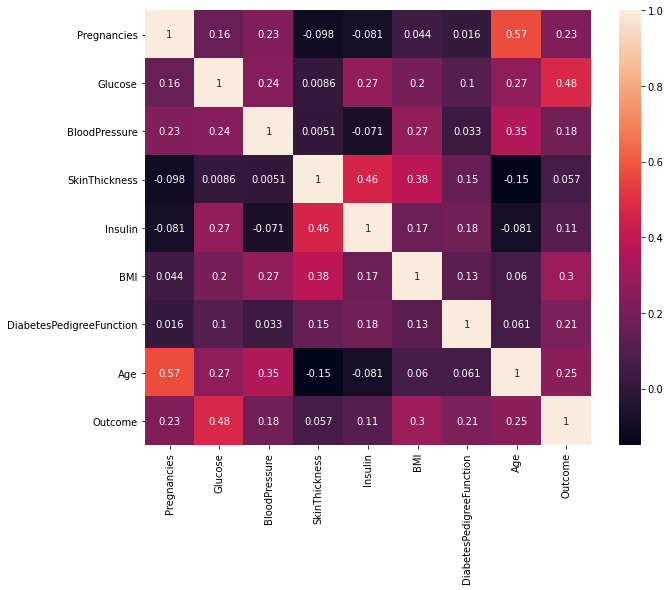

In [74]:
sns.heatmap(new_data.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#Evaluating for multiple models


In [75]:
X=new_data.drop(columns=['Outcome','Pregnancies'])
y=new_data['Outcome']

In [76]:
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [77]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 688, dtype: int64

In [78]:
from sklearn.preprocessing import StandardScaler
col_names = [
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']
features = X[col_names]


scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [79]:
scaled_features.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.924040,-0.028115,0.923219,-0.805266,0.210285,0.606516,1.479220
1,-1.177082,-0.515765,0.533462,-0.805266,-0.848063,-0.364220,-0.183265
2,2.091330,-0.678315,-1.350366,-0.805266,-1.346999,0.764788,-0.095766
3,-1.043678,-0.515765,0.143704,0.238698,-0.621274,-1.011378,-1.058257
4,-0.143197,0.134435,-1.350366,-0.805266,-0.999256,-0.891795,-0.270764


In [80]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(scaled_features,y,test_size=0.2)

# Applying SVM 

In [81]:
from sklearn.svm import SVC
svc = SVC( gamma = 'auto',random_state=12)
svc.fit(train_X, train_y)
print("Accuracy on training set: {:.2f}".format(svc.score(train_X, train_y)))
print("Accuracy on test set: {:.2f}".format(svc.score(test_X, test_y)))

Accuracy on training set: 0.83
Accuracy on test set: 0.77


In [82]:
svc_pred = svc.predict(test_X)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(test_y, svc_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        89
           1       0.79      0.47      0.59        49

    accuracy                           0.77       138
   macro avg       0.78      0.70      0.71       138
weighted avg       0.77      0.77      0.75       138



#decision tree classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=12)
DT.fit(train_X, train_y)

print("Accuracy on training set: {:.2f}".format(DT.score(train_X, train_y)))
print("Accuracy on test set: {:.2f}".format(DT.score(test_X, test_y)))


Accuracy on training set: 1.00
Accuracy on test set: 0.72


In [85]:
DT_pred = DT.predict(test_X)

In [86]:
from sklearn.metrics import classification_report
print(classification_report(test_y, DT_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80        89
           1       0.63      0.53      0.58        49

    accuracy                           0.72       138
   macro avg       0.70      0.68      0.69       138
weighted avg       0.72      0.72      0.72       138



#random forest

In [87]:

rf = RandomForestClassifier(random_state=12)
model_rf = rf.fit(train_X,train_y)

print("Accuracy on training set: {:.2f}".format(model_rf.score(train_X, train_y)))
print("Accuracy on test set: {:.2f}".format(model_rf.score(test_X, test_y)))



Accuracy on training set: 1.00
Accuracy on test set: 0.78


In [88]:
model_rf_pred = model_rf.predict(test_X)
model_rf_pred_train = model_rf.predict(train_X)

In [89]:
from sklearn.metrics import classification_report
print(classification_report(test_y, model_rf_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        89
           1       0.75      0.55      0.64        49

    accuracy                           0.78       138
   macro avg       0.77      0.72      0.74       138
weighted avg       0.77      0.78      0.77       138



In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, model_rf_pred)

array([[80,  9],
       [22, 27]])

In [91]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [92]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [93]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [94]:
rf_random.fit(train_X, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   50.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [95]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [96]:
reg_rf_new = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)
reg_rf_new.fit(train_X, train_y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [97]:
reg_rf_new.score(train_X, train_y)

0.9418181818181818

In [98]:

reg_rf_new.score(test_X, test_y)

0.7681159420289855

In [99]:
reg_rf_new_pred = reg_rf_new.predict(test_X)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(test_y, reg_rf_new_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        89
           1       0.74      0.53      0.62        49

    accuracy                           0.77       138
   macro avg       0.76      0.71      0.73       138
weighted avg       0.76      0.77      0.76       138



#gaussian naive bayes

In [101]:
gnb = GaussianNB()
modelgnb = gnb.fit(train_X,train_y)

print("Accuracy on training set: {:.2f}".format(modelgnb.score(train_X, train_y)))
print("Accuracy on test set: {:.2f}".format(modelgnb.score(test_X, test_y)))


Accuracy on training set: 0.76
Accuracy on test set: 0.82


In [102]:
modelgnb_pred = modelgnb.predict(test_X)

In [103]:
from sklearn.metrics import classification_report
print(classification_report(test_y, modelgnb_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        89
           1       0.82      0.63      0.71        49

    accuracy                           0.82       138
   macro avg       0.82      0.78      0.79       138
weighted avg       0.82      0.82      0.81       138



#Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=12)
log.fit(train_X,train_y)

print("Accuracy on training set: {:.2f}".format(log.score(train_X, train_y)))
print("Accuracy on test set: {:.2f}".format(log.score(test_X, test_y)))


Accuracy on training set: 0.78
Accuracy on test set: 0.82


In [105]:
log_pred = log.predict(test_X)

In [106]:
from sklearn.metrics import classification_report
print(classification_report(test_y, log_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        89
           1       0.85      0.59      0.70        49

    accuracy                           0.82       138
   macro avg       0.83      0.77      0.78       138
weighted avg       0.82      0.82      0.81       138



In [107]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
clf = GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, cv=5, scoring="accuracy")
clf.fit(train_X, train_y)



GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [108]:
clf.best_params_

{'C': 0.5}

In [109]:
from sklearn.linear_model import LogisticRegression
log1 = LogisticRegression(random_state=12,C=0.1)
log1.fit(train_X,train_y)

print("Accuracy on training set: {:.2f}".format(log1.score(train_X, train_y)))
print("Accuracy on test set: {:.2f}".format(log1.score(test_X, test_y)))


Accuracy on training set: 0.78
Accuracy on test set: 0.83


In [110]:
from sklearn.linear_model import LogisticRegressionCV
clf1 = LogisticRegressionCV(cv=5, random_state=0).fit(train_X, train_y)

print("Accuracy on training set: {:.2f}".format(clf1.score(train_X, train_y)))
print("Accuracy on test set: {:.2f}".format(clf1.score(test_X, test_y)))


Accuracy on training set: 0.78
Accuracy on test set: 0.82


In [111]:
print(classification_report(test_y, clf1.predict(test_X)))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        89
           1       0.85      0.59      0.70        49

    accuracy                           0.82       138
   macro avg       0.83      0.77      0.78       138
weighted avg       0.82      0.82      0.81       138



In [112]:
confusion_matrix(test_y,clf1.predict(test_X))

array([[84,  5],
       [20, 29]])

In [113]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf1, train_X, train_y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.76363636 0.8        0.76363636 0.85454545 0.72727273 0.8
 0.72727273 0.74545455 0.8        0.74545455]


In [114]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7272727272727273, 0.7727272727272727, 0.8545454545454545)

#XG

In [115]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=12)
model5.fit(train_X,train_y)
y_pred5 = model5.predict(test_X)

print("Accuracy on training set: {:.2f}".format(model5.score(train_X, train_y)))
print("Accuracy on test set: {:.2f}".format(model5.score(test_X, test_y)))

Accuracy on training set: 0.89
Accuracy on test set: 0.77


In [116]:
y_pred = clf1.predict([[148,72,35,0,33.6,0.627,50]])
y_pred

array([1])

In [117]:
y_pred = clf1.predict([[131,68,21,166,33.1,0.16,28]])
y_pred

array([1])

# Save Model

In [118]:
from sklearn.externals import joblib
# Save to file in the current working directory
joblib_file = "Health_Care_Diabetes_Prediction.pkl"
joblib.dump(model_rf, joblib_file)


['Health_Care_Diabetes_Prediction.pkl']

In [119]:
# Load from file
model = joblib.load("Health_Care_Diabetes_Prediction.pkl")

In [120]:
result = model.predict([[131,68,21,166,33.1,0.16,28]])
result

array([1])

In [121]:
result = model.predict([[101	,76,	48,	180	,32.9	,0.171,	63]])
result

array([1])